In [47]:
import matplotlib.pyplot as plt
import csv

In [209]:
data_tasklet_scaling = """results_and_timings(cycles), 1, 1, 60000, 2.77176e+10, 2868.223000, 71.662000, 255.360000, 80.764000, 79194.344000, 6.377000
results_and_timings(cycles), 1, 2, 60000, 6.9795e+09, 2871.381000, 71.373000, 257.062000, 92.964000, 39883.694000, 6.405000
results_and_timings(cycles), 1, 3, 60000, 3.12252e+09, 2870.393000, 71.826000, 255.078000, 78.950000, 26765.079000, 6.435000
results_and_timings(cycles), 1, 4, 60000, 1.77025e+09, 2874.768000, 71.613000, 256.524000, 83.985000, 20232.047000, 6.464000
results_and_timings(cycles), 1, 5, 60000, 1.14069e+09, 2874.171000, 71.783000, 254.604000, 79.793000, 16296.164000, 6.437000
results_and_timings(cycles), 1, 6, 60000, 7.99254e+08, 2867.988000, 73.395000, 257.015000, 94.704000, 13701.997000, 6.441000
results_and_timings(cycles), 1, 9, 60000, 3.76641e+08, 2874.101000, 71.752000, 254.707000, 80.386000, 9685.542000, 6.401000
results_and_timings(cycles), 1, 12, 60000, 2.4497e+08, 2873.100000, 71.599000, 262.373000, 91.259000, 8399.409000, 6.366000
results_and_timings(cycles), 1, 16, 60000, 1.79954e+08, 2870.076000, 71.777000, 255.614000, 83.367000, 8226.904000, 6.415000
results_and_timings(cycles), 1, 20, 60000, 1.43959e+08, 2873.126000, 71.695000, 256.782000, 86.732000, 8226.672000, 6.541000
results_and_timings(cycles), 1, 24, 60000, 1.19965e+08, 2868.001000, 71.924000, 256.197000, 85.990000, 8226.621000, 6.419000"""

data_sample_scaling = """results_and_timings(cycles), 1, 16, 500, 1.51738e+06, 19.369000, 0.510000, 0.904000, 13.220000, 69.651000, 0.180000
results_and_timings(cycles), 1, 16, 1000, 3.00673e+06, 40.412000, 1.115000, 1.942000, 13.969000, 137.743000, 0.237000
results_and_timings(cycles), 1, 16, 5000, 1.50041e+07, 221.465000, 6.058000, 15.661000, 19.894000, 686.190000, 0.622000
results_and_timings(cycles), 1, 16, 10000, 2.99931e+07, 450.086000, 11.601000, 41.706000, 26.044000, 1371.408000, 1.095000
results_and_timings(cycles), 1, 16, 15000, 4.49966e+07, 688.301000, 17.466000, 62.877000, 31.970000, 2057.318000, 1.803000
results_and_timings(cycles), 1, 16, 30000, 8.99778e+07, 1424.929000, 35.408000, 128.293000, 54.840000, 4113.644000, 3.291000
results_and_timings(cycles), 1, 16, 60000, 1.79954e+08, 2866.672000, 71.646000, 256.818000, 85.568000, 8226.898000, 6.478000"""

data_dpu_strong_scaling = """results_and_timings(cycles), 1, 16, 60000, 1.79955e+08, 2868.067000, 73.435000, 255.104000, 80.370000, 8226.942000, 6.434000
results_and_timings(cycles), 2, 16, 60000, 8.99781e+07, 2874.158000, 71.842000, 254.249000, 55.092000, 4113.638000, 3.597000
results_and_timings(cycles), 4, 16, 60000, 4.49967e+07, 2878.147000, 71.247000, 264.682000, 37.039000, 2057.325000, 2.180000
results_and_timings(cycles), 8, 16, 60000, 2.24967e+07, 2871.391000, 72.042000, 255.023000, 27.735000, 1028.611000, 1.371000
results_and_timings(cycles), 16, 16, 60000, 1.12601e+07, 2873.696000, 71.869000, 264.103000, 37.824000, 514.916000, 1.338000
results_and_timings(cycles), 32, 16, 60000, 5.64432e+06, 2867.094000, 71.962000, 261.527000, 28.082000, 258.193000, 0.778000
results_and_timings(cycles), 64, 16, 60000, 2.81718e+06, 2869.155000, 73.901000, 264.111000, 23.452000, 128.941000, 0.469000"""

data_dpu_weak_scaling = """results_and_timings(cycles), 1, 16, 937, 2.8159e+06, 37.788000, 1.059000, 1.802000, 13.959000, 128.999000, 0.218000
results_and_timings(cycles), 2, 16, 1874, 2.81603e+06, 80.043000, 2.200000, 3.783000, 13.389000, 129.011000, 0.227000
results_and_timings(cycles), 4, 16, 3748, 2.81589e+06, 163.939000, 4.446000, 11.104000, 14.100000, 129.014000, 0.232000
results_and_timings(cycles), 8, 16, 7496, 2.81594e+06, 334.981000, 8.714000, 30.136000, 15.618000, 128.887000, 0.236000
results_and_timings(cycles), 16, 16, 14992, 2.81613e+06, 688.510000, 17.569000, 64.771000, 24.354000, 128.901000, 0.378000
results_and_timings(cycles), 32, 16, 29984, 2.81608e+06, 1425.746000, 35.630000, 130.338000, 23.020000, 128.892000, 0.456000
results_and_timings(cycles), 64, 16, 59968, 2.81612e+06, 2868.398000, 72.053000, 265.289000, 26.005000, 128.899000, 0.483000"""

In [210]:
descr_col = 0
dpu_col = 1
tasklet_col = 2
samples_col = 3
cycles_col = 4
t_binarize_col = 5
t_reorder_col = 6
t_hash_col = 7
t_transfer1_col = 8
t_dpu_col = 9
t_transfer2_col = 10
t_cpu_col = 11

col_types = [str, int, int, int, float, float, float, float, float, float, float, float]

In [211]:
def print_csv(csv_parsed):
    for row in csv_parsed:
        print(row)

In [212]:
def selectColumn(csv_parsed, column):
    return [row[column] for row in csv_parsed]

In [213]:
def cast_csv(csv_parsed, col_types):
    for row in csv_parsed:
        for i in range(len(row)):
            row[i] = col_types[i](row[i])

def parse_csv(csv_string, types=col_types):
    parsed = list(csv.reader(csv_string.splitlines(), delimiter=','))
    cast_csv(parsed, types)
    return parsed

In [214]:
data_tasklet_scaling_csv = parse_csv(data_tasklet_scaling)
data_sample_scaling_csv = parse_csv(data_sample_scaling)
data_dpu_strong_scaling_csv = parse_csv(data_dpu_strong_scaling)
data_dpu_weak_scaling_csv = parse_csv(data_dpu_weak_scaling)

In [215]:
tasklet_scaling_x = selectColumn(data_tasklet_scaling_csv, tasklet_col)
tasklet_scaling_cycles = selectColumn(data_tasklet_scaling_csv, cycles_col)

tasklet_scaling_binarize_time = selectColumn(data_tasklet_scaling_csv, t_binarize_col)
tasklet_scaling_reorder_time = selectColumn(data_tasklet_scaling_csv, t_reorder_col)
tasklet_scaling_hash_time = selectColumn(data_tasklet_scaling_csv, t_hash_col)

tasklet_scaling_transfer1_time = selectColumn(data_tasklet_scaling_csv, t_transfer1_col)
tasklet_scaling_dpu_time = selectColumn(data_tasklet_scaling_csv, t_dpu_col)
tasklet_scaling_transfer2_time = selectColumn(data_tasklet_scaling_csv, t_transfer2_col)

tasklet_scaling_cpu_time = selectColumn(data_tasklet_scaling_csv, t_cpu_col)

In [216]:
sample_scaling_x = selectColumn(data_sample_scaling_csv, samples_col)
sample_scaling_cycles = selectColumn(data_sample_scaling_csv, cycles_col)

sample_scaling_binarize_time = selectColumn(data_sample_scaling_csv, t_binarize_col)
sample_scaling_reorder_time = selectColumn(data_sample_scaling_csv, t_reorder_col)
sample_scaling_hash_time = selectColumn(data_sample_scaling_csv, t_hash_col)

sample_scaling_transfer1_time = selectColumn(data_sample_scaling_csv, t_transfer1_col)
sample_scaling_dpu_time = selectColumn(data_sample_scaling_csv, t_dpu_col)
sample_scaling_transfer2_time = selectColumn(data_sample_scaling_csv, t_transfer2_col)

sample_scaling_cpu_time = selectColumn(data_sample_scaling_csv, t_cpu_col)

In [217]:
dpu_strong_scaling_x = selectColumn(data_dpu_strong_scaling_csv, dpu_col)
dpu_strong_scaling_cycles = selectColumn(data_dpu_strong_scaling_csv, cycles_col)

dpu_strong_scaling_binarize_time = selectColumn(data_dpu_strong_scaling_csv, t_binarize_col)
dpu_strong_scaling_reorder_time = selectColumn(data_dpu_strong_scaling_csv, t_reorder_col)
dpu_strong_scaling_hash_time = selectColumn(data_dpu_strong_scaling_csv, t_hash_col)

dpu_strong_scaling_transfer1_time = selectColumn(data_dpu_strong_scaling_csv, t_transfer1_col)
dpu_strong_scaling_dpu_time = selectColumn(data_dpu_strong_scaling_csv, t_dpu_col)
dpu_strong_scaling_transfer2_time = selectColumn(data_dpu_strong_scaling_csv, t_transfer2_col)

dpu_strong_scaling_cpu_time = selectColumn(data_dpu_strong_scaling_csv, t_cpu_col)

In [218]:
dpu_weak_scaling_x = selectColumn(data_dpu_weak_scaling_csv, dpu_col)
dpu_weak_scaling_cycles = selectColumn(data_dpu_weak_scaling_csv, cycles_col)

dpu_weak_scaling_binarize_time = selectColumn(data_dpu_weak_scaling_csv, t_binarize_col)
dpu_weak_scaling_reorder_time = selectColumn(data_dpu_weak_scaling_csv, t_reorder_col)
dpu_weak_scaling_hash_time = selectColumn(data_dpu_weak_scaling_csv, t_hash_col)

dpu_weak_scaling_transfer1_time = selectColumn(data_dpu_weak_scaling_csv, t_transfer1_col)
dpu_weak_scaling_dpu_time = selectColumn(data_dpu_weak_scaling_csv, t_dpu_col)
dpu_weak_scaling_transfer2_time = selectColumn(data_dpu_weak_scaling_csv, t_transfer2_col)

dpu_weak_scaling_cpu_time = selectColumn(data_dpu_weak_scaling_csv, t_cpu_col)

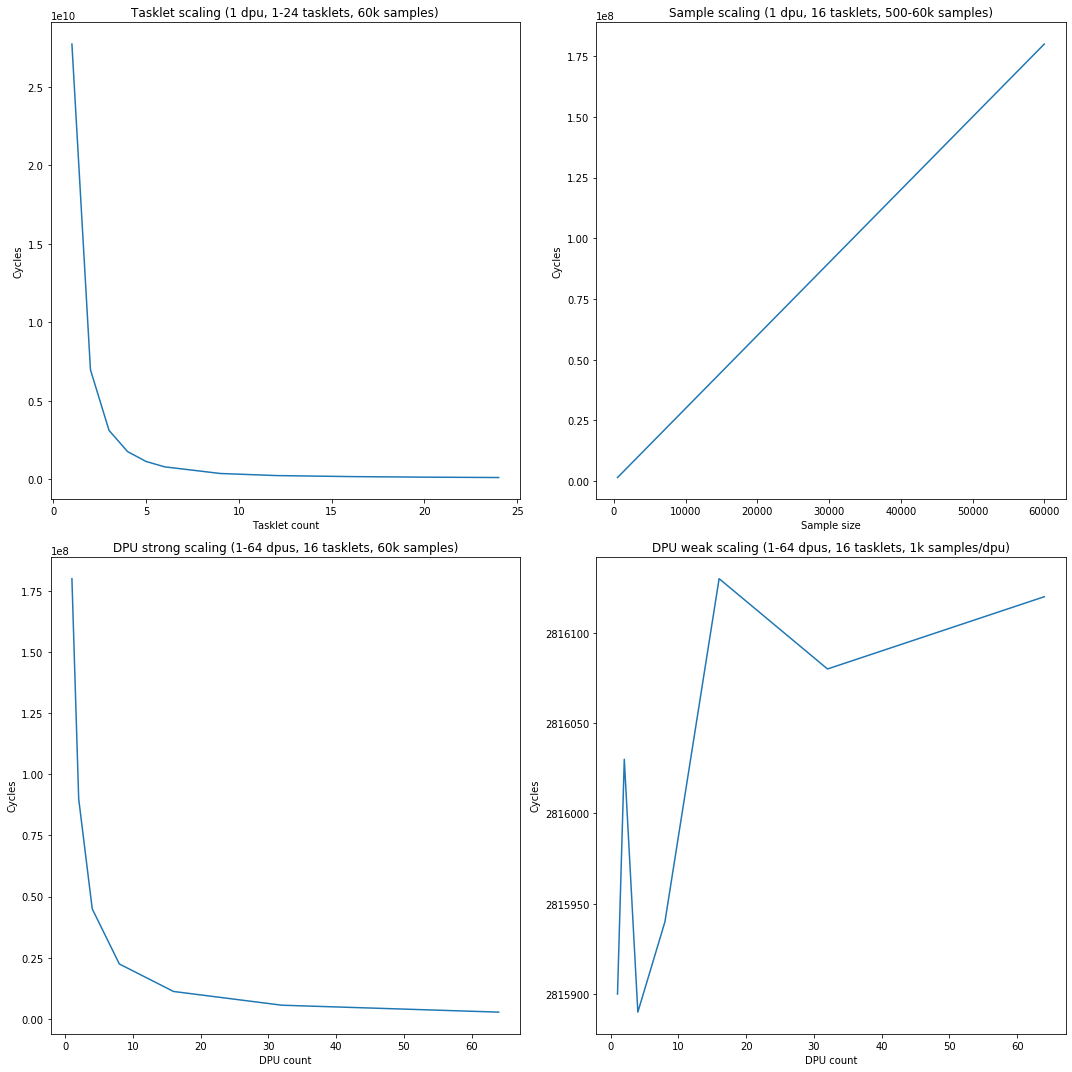

In [219]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
ax1, ax2, ax3, ax4 = axes.flat

ax1.plot(tasklet_scaling_x, tasklet_scaling_cycles)

ax1.set_xlabel("Tasklet count")
ax1.set_ylabel("Cycles")

ax1.set_title("Tasklet scaling (1 dpu, 1-24 tasklets, 60k samples)")

ax2.plot(sample_scaling_x, sample_scaling_cycles)

ax2.set_xlabel("Sample size")
ax2.set_ylabel("Cycles")

ax2.set_title("Sample scaling (1 dpu, 16 tasklets, 500-60k samples)")

ax3.plot(dpu_strong_scaling_x, dpu_strong_scaling_cycles)

ax3.set_xlabel("DPU count")
ax3.set_ylabel("Cycles")

ax3.set_title("DPU strong scaling (1-64 dpus, 16 tasklets, 60k samples)")

ax4.plot(dpu_weak_scaling_x, dpu_weak_scaling_cycles)

ax4.set_xlabel("DPU count")
ax4.set_ylabel("Cycles")

ax4.set_title("DPU weak scaling (1-64 dpus, 16 tasklets, 1k samples/dpu)")

fig.tight_layout()

fig.savefig('wnn_analysis.png')

plt.show()

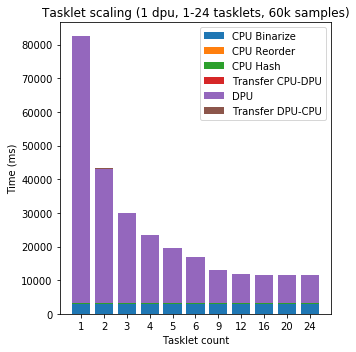

In [242]:
# Make a barchart of the tasklet scaling timings, to show the composition of the total time it takes

fig, ax = plt.subplots(figsize=(5, 5))

str_x = [str(x) for x in tasklet_scaling_x]
components = [
    tasklet_scaling_binarize_time,
    tasklet_scaling_reorder_time,
    tasklet_scaling_hash_time,
    tasklet_scaling_transfer1_time,
    tasklet_scaling_dpu_time,
    tasklet_scaling_transfer2_time
]
labels = [
    "CPU Binarize",
    "CPU Reorder",
    "CPU Hash",
    "Transfer CPU-DPU",
    "DPU",
    "Transfer DPU-CPU"
]
for i, (component, label) in enumerate(zip(components, labels)):
    components_before = [0 for _ in range(len(component))] if i == 0 else [sum(x) for x in zip(*components[:i])]
    ax.bar(str_x, component, label=label, bottom=components_before)
# ax.bar(str_x, tasklet_scaling_cpu_time, label="Baseline CPU")

ax.set_xticks(str_x)

ax.set_xlabel("Tasklet count")
ax.set_ylabel("Time (ms)")

ax.set_title("Tasklet scaling (1 dpu, 1-24 tasklets, 60k samples)")

ax.legend()

fig.tight_layout()

fig.savefig('tasklet_scaling_time.png')

plt.show()


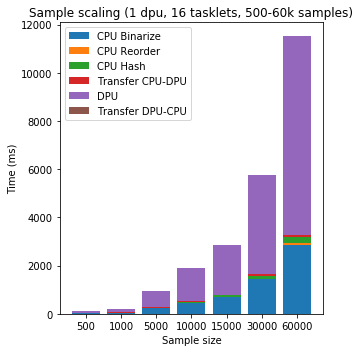

In [236]:
# Same as above but for sample scaling

fig, ax = plt.subplots(figsize=(5, 5))

width = 0.7
str_x = [str(x) for x in sample_scaling_x]

start = 1
components = [
    sample_scaling_binarize_time,
    sample_scaling_reorder_time,
    sample_scaling_hash_time,
    sample_scaling_transfer1_time,
    sample_scaling_dpu_time,
    sample_scaling_transfer2_time
][start]
labels = [
    "CPU Binarize",
    "CPU Reorder",
    "CPU Hash",
    "Transfer CPU-DPU",
    "DPU",
    "Transfer DPU-CPU"
][start]
for i, component in enumerate(components):
    components_before = [0 for _ in range(len(component))] if i == 0 else [sum(x) for x in zip(*components[:i])]
    ax.bar(str_x, component, label=labels[i], bottom=components_before)


ax.set_xticks(str_x)

ax.set_xlabel("Sample size")
ax.set_ylabel("Time (ms)")

ax.set_title("Sample scaling (1 dpu, 16 tasklets, 500-60k samples)")

ax.legend()

fig.tight_layout()

fig.savefig('sample_scaling_time.png')

plt.show()


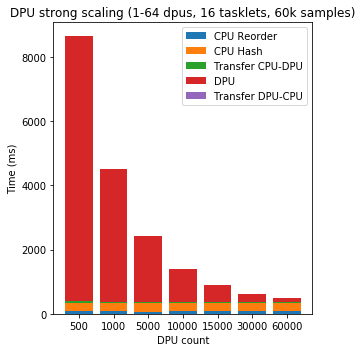

In [247]:
# Same as above but for dpu strong scaling

fig, ax = plt.subplots(figsize=(5, 5))

width = 0.75
str_x = [str(x) for x in sample_scaling_x]
start = 1
components = [
    dpu_strong_scaling_binarize_time,
    dpu_strong_scaling_reorder_time,
    dpu_strong_scaling_hash_time,
    dpu_strong_scaling_transfer1_time,
    dpu_strong_scaling_dpu_time,
    dpu_strong_scaling_transfer2_time
][start:]
labels = [
    "CPU Binarize",
    "CPU Reorder",
    "CPU Hash",
    "Transfer CPU-DPU",
    "DPU",
    "Transfer DPU-CPU"
][start:]
for i, component in enumerate(components):
    components_before = [0 for _ in range(len(component))] if i == 0 else [sum(x) for x in zip(*components[:i])]
    ax.bar(str_x, component, label=labels[i], bottom=components_before)


ax.set_xticks(str_x)

ax.set_xlabel("DPU count")
ax.set_ylabel("Time (ms)")

ax.set_title("DPU strong scaling (1-64 dpus, 16 tasklets, 60k samples)")

ax.legend()

fig.tight_layout()

fig.savefig('dpu_strong_scaling_time.png')

plt.show()  

0
1
2
3
4


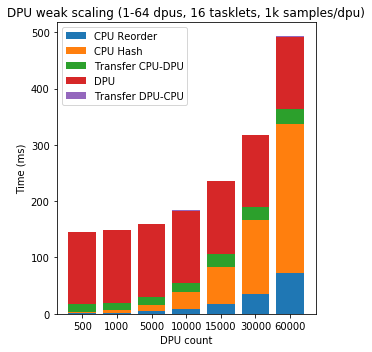

In [246]:
# Same as above but for dpu weak scaling

fig, ax = plt.subplots(figsize=(5, 5))

width = 0.7
str_x = [str(x) for x in sample_scaling_x]

start = 1
components = [
    dpu_weak_scaling_binarize_time,
    dpu_weak_scaling_reorder_time,
    dpu_weak_scaling_hash_time,
    dpu_weak_scaling_transfer1_time,
    dpu_weak_scaling_dpu_time,
    dpu_weak_scaling_transfer2_time
][start:]
labels = [
    "CPU Binarize",
    "CPU Reorder",
    "CPU Hash",
    "Transfer CPU-DPU",
    "DPU",
    "Transfer DPU-CPU"
][start:]
for i, component in enumerate(components):
    components_before = [0 for _ in range(len(component))] if i == 0 else [sum(x) for x in zip(*components[:i])]
    ax.bar(str_x, component, label=labels[i], bottom=components_before)

ax.set_xticks(str_x)

ax.set_xlabel("DPU count")
ax.set_ylabel("Time (ms)")

ax.set_title("DPU weak scaling (1-64 dpus, 16 tasklets, 1k samples/dpu)")

ax.legend()

fig.tight_layout()

fig.savefig('dpu_weak_scaling_time.png')

plt.show()